# Import Packages

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import time

# Download Data

In [2]:
gdp = pd.read_csv("gdp_weights.csv")
state_id = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/GeoIDs%20-%20State.csv")
low_inc_small_biz_employment = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Low%20Inc%20Emp%20Small%20Businesses%20-%20State%20-%20Daily.csv")
small_biz_openings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Womply%20Merchants%20-%20State%20-%20Daily.csv")
job_posting = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Burning%20Glass%20-%20State%20-%20Weekly.csv")
low_inc_small_biz_earnings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Low%20Inc%20Earnings%20All%20Businesses%20-%20State%20-%20Daily.csv")
spending_data = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Affinity%20-%20State%20-%20Daily.csv")
smal_biz_revenue =pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Womply%20Revenue%20-%20State%20-%20Daily.csv")

In [3]:
mobility = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Google%20Mobility%20-%20State%20-%20Daily.csv")
fips_code =pd.read_csv("https://gist.githubusercontent.com/dantonnoriega/bf1acd2290e15b91e6710b6fd3be0a53/raw/11d15233327c8080c9646c7e1f23052659db251d/us-state-ansi-fips.csv")    

# Merge Location Data

In [4]:
location = pd.merge(gdp[["State","GDP_Contribution","Region"]],
                  state_id[["statename","stateabbrev"]],
                  left_on = "State",
                  right_on ="statename",
                  how='left')
location = pd.merge(location,
                  fips_code,
                  left_on = "State",
                  right_on ="stname",
                  how='left')

location = location.rename(columns={" st": "FIPS"})



# Clean Up Small Biz Data

In [5]:
smal_biz_revenue["date"] = smal_biz_revenue['day'].map(str) + '-' + smal_biz_revenue['month'].map(str) + '-' + smal_biz_revenue['year'].map(str)
small_biz_openings["date"] = small_biz_openings['day'].map(str) + '-' + small_biz_openings['month'].map(str) + '-' + small_biz_openings['year'].map(str)

In [6]:
#reindex the series
small_biz_data = small_biz_openings[["merchants_all","statefips","date"]].copy()
small_biz_data["merchants_all"]= small_biz_data["merchants_all"]*100 
small_biz_data["merchants_all"]=small_biz_data["merchants_all"]+100

#reindex the series
smal_biz_revenue_data = smal_biz_revenue[["revenue_all","statefips","date"]].copy()
smal_biz_revenue_data["revenue_all"]= smal_biz_revenue_data["revenue_all"]*100
smal_biz_revenue_data["revenue_all"]=smal_biz_revenue_data["revenue_all"]+100

In [7]:
small_biz_combo = pd.merge(small_biz_data,
                  smal_biz_revenue_data,
                  left_on = ["statefips","date"],
                  right_on =["statefips","date"],
                  how='left')

# Clean up Mobility Data

In [8]:
mobility["date"] = mobility['day'].map(str) + '-' + mobility['month'].map(str) + '-' + mobility['year'].map(str)

In [9]:
#reindex the series
mobility_data = mobility[["gps_workplaces","statefips","date"]].copy()
mobility_data["gps_workplaces"]= mobility_data["gps_workplaces"]*100 
mobility_data["gps_workplaces"]=mobility_data["gps_workplaces"]+100

# Clean up Affinity Data

In [10]:
spending_data["date"] = spending_data['day'].map(str) + '-' + spending_data['month'].map(str) + '-' + spending_data['year'].map(str)

In [11]:
#reindex the series
spending = spending_data[["spend_all","statefips","date"]].copy()
spending["spend_all"]= spending["spend_all"]*100 
spending["spend_all"]=spending["spend_all"]+100

# Merge all the Data

In [12]:
df1 = pd.merge(small_biz_combo,
                  spending,
                  left_on =["statefips","date"] ,
                  right_on =["statefips","date"],
                  how='left')

In [13]:
df2 = pd.merge(df1,
                  mobility_data,
                  left_on =["statefips","date"] ,
                  right_on =["statefips","date"],
                  how='left')

In [14]:
df3 = pd.merge(df2,
                  location,
                  left_on =["statefips"] ,
                  right_on =["FIPS"],
                  how='left')

In [15]:
df3 = df3.dropna()

In [16]:
df4 = df3[["date","State","GDP_Contribution","merchants_all","revenue_all","spend_all","gps_workplaces","Region"]].copy()

In [17]:
df4

,date,State,GDP_Contribution,merchants_all,revenue_all,spend_all,gps_workplaces,Region
1836,15-2-2020,Alabama,0.011,98.590,110.80,97.480,102.0,Southeast
1837,15-2-2020,Alaska,0.003,98.450,109.63,105.660,101.0,Far West
1838,15-2-2020,Arizona,0.017,99.088,112.70,100.268,99.0,Southwest
1839,15-2-2020,Arkansas,0.006,100.728,106.09,98.640,101.0,Southeast
1840,15-2-2020,California,0.146,100.541,112.00,101.660,99.0,Far West
...,...,...,...,...,...,...,...,...
8818,30-6-2020,Virginia,0.026,79.700,71.40,90.240,61.0,Southeast
8819,30-6-2020,Washington,0.028,81.600,76.30,88.400,58.0,Far West
8820,30-6-2020,West Virginia,0.004,85.600,87.40,99.236,72.0,Southeast
8821,30-6-2020,Wisconsin,0.016,75.600,79.80,91.250,68.0,Great Lakes


# US Weighted by GDP

In [18]:
#Create the components to be summed
df4["merchant_ag"]= df4["merchants_all"]*df4["GDP_Contribution"]
df4["revenue_ag"]= df4["revenue_all"]*df4["GDP_Contribution"]
df4["spend_ag"]= df4["spend_all"]*df4["GDP_Contribution"]
df4["workplace_ag"]= df4["gps_workplaces"]*df4["GDP_Contribution"]

In [19]:
dfz= df4.copy()
dfz["Date"]=dfz["date"]
dfz['date'] =  pd.to_datetime(dfz['date'], format='%d-%m-%Y')
dfz = dfz.set_index('date')

In [20]:
df5 = pd.DataFrame(dfz.groupby('date')["merchant_ag"].sum())
df5["revenue_ag"] = pd.DataFrame(dfz.groupby('date')["revenue_ag"].sum())
df5["spend_ag"] = pd.DataFrame(dfz.groupby('date')["spend_ag"].sum())
df5["workplace_ag"] = pd.DataFrame(dfz.groupby('date')["workplace_ag"].sum())

In [22]:
df5

,merchant_ag,revenue_ag,spend_ag,workplace_ag
date,,,,
2020-02-15,97.296912,108.039340,97.216496,98.163
2020-02-16,97.307891,104.717757,97.051279,97.932
2020-02-17,97.339728,96.719229,97.516522,73.168
2020-02-18,97.303206,104.050420,97.074811,96.804
2020-02-19,97.139563,103.589419,96.800636,97.816
...,...,...,...,...
2020-06-26,83.091970,82.454782,89.004553,62.052
2020-06-27,82.345090,81.393822,88.361712,84.741
2020-06-28,81.833430,79.811754,88.026162,85.968


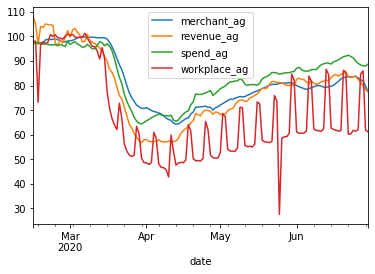

In [23]:
df6= df5[["merchant_ag","revenue_ag","spend_ag","workplace_ag"]].copy()
df6.plot()

# Regional Weight

In [24]:
#set to only get unique values
S_east = df4['Region'] == "Southeast"
F_west = df4['Region'] == "Far West"
S_west = df4['Region'] == "Southwest"
M_east = df4['Region'] == "Mideast"
G_Lakes = df4['Region'] == "Great Lakes"
Plains = df4['Region'] == "Plains"
N_Eng = df4['Region'] == "New England"
R_Mountain = df4['Region'] == "Rocky Mountain"

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


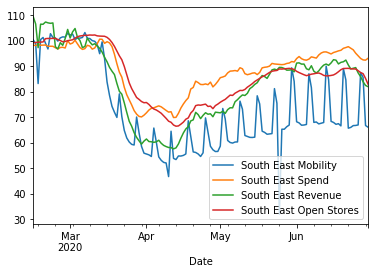

In [26]:
#dataframe for region
df_SE = df4[S_east]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["South East Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['South East Mobility'].sum())
df_SE2["South East Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["South East Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["South East Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df6, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


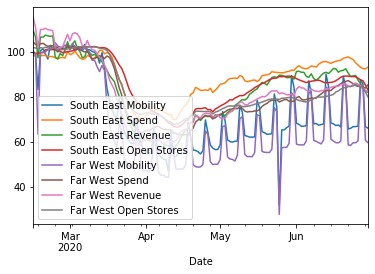

In [27]:
#dataframe for region
df_SE = df4[F_west]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["Far West Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["Far West Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Far West Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Far West Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


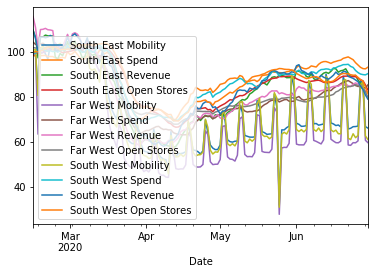

In [28]:
#dataframe for region
df_SE = df4[S_west]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["South West Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["South West Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["South West Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["South West Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


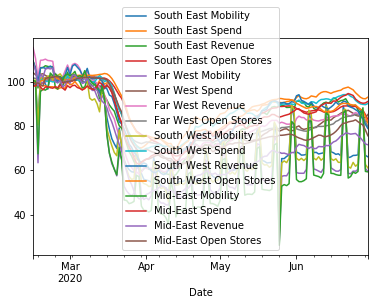

In [29]:
#dataframe for region
df_SE = df4[M_east]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["Mid-East Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["Mid-East Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Mid-East Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Mid-East Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


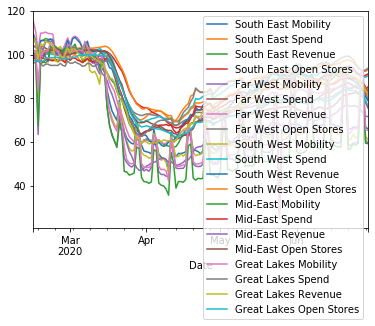

In [30]:
#dataframe for region
df_SE = df4[G_Lakes]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["Great Lakes Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["Great Lakes Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Great Lakes Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Great Lakes Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


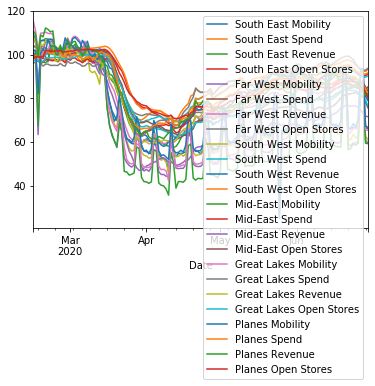

In [31]:
#dataframe for region
df_SE = df4[Plains]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["Planes Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["Planes Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Planes Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Planes Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


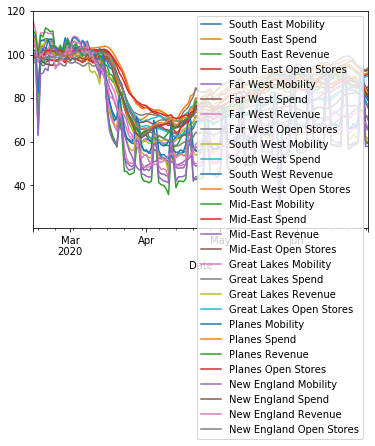

In [32]:
#dataframe for region
df_SE = df4[N_Eng]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["New England Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["New England Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["New England Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["New England Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


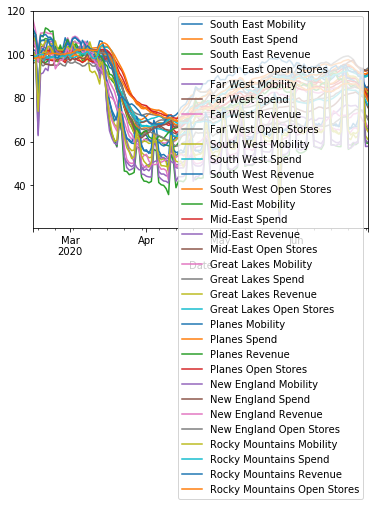

In [33]:
#dataframe for region
df_SE = df4[R_Mountain]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["regionally_weighted_mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2["Rocky Mountains Mobility"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_mobility'].sum())
df_SE2["Rocky Mountains Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Rocky Mountains Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Rocky Mountains Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_done = df_SE2.merge(df6, left_index=True, right_index=True)

In [35]:
df_done.to_csv("covid_data.csv")